In [1]:
import pandas as pd
from datetime import datetime
time_stamp = pd.Timestamp(datetime(2025, 1, 1))
pd.Timestamp('2025-01-01') == time_stamp

True

In [3]:
time_stamp

Timestamp('2025-01-01 00:00:00')

In [21]:
time_stamp.year

2025

In [11]:
time_stamp.month_name() # .month

'January'

In [15]:
time_stamp.day_name() # .day

'Wednesday'

In [25]:
# Period object always has frequency
period = pd.Period('2025-01')
period
# Period object has freq attribute to store frequency

Period('2025-01', 'M')

In [27]:
period.asfreq('D') # convert to daily

Period('2025-01-31', 'D')

In [31]:
period.to_timestamp().to_period('M')

Period('2025-01', 'M')

In [33]:
period + 2

Period('2025-03', 'M')

In [41]:
# pd.Timestamp('2025-01-31', 'M')

In [61]:
index = pd.date_range(start = '2025-1-1', periods = 31, freq = 'D')

In [63]:
index   # default is daily frequency to above code

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05', '2025-01-06', '2025-01-07', '2025-01-08',
               '2025-01-09', '2025-01-10', '2025-01-11', '2025-01-12',
               '2025-01-13', '2025-01-14', '2025-01-15', '2025-01-16',
               '2025-01-17', '2025-01-18', '2025-01-19', '2025-01-20',
               '2025-01-21', '2025-01-22', '2025-01-23', '2025-01-24',
               '2025-01-25', '2025-01-26', '2025-01-27', '2025-01-28',
               '2025-01-29', '2025-01-30', '2025-01-31'],
              dtype='datetime64[ns]', freq='D')

In [406]:
index = pd.date_range(start = '2025-1-1', periods = 12, freq = 'M')

In [67]:
index

DatetimeIndex(['2025-01-31', '2025-02-28', '2025-03-31', '2025-04-30',
               '2025-05-31', '2025-06-30', '2025-07-31', '2025-08-31',
               '2025-09-30', '2025-10-31', '2025-11-30', '2025-12-31'],
              dtype='datetime64[ns]', freq='ME')

In [69]:
index[0]

Timestamp('2025-01-31 00:00:00')

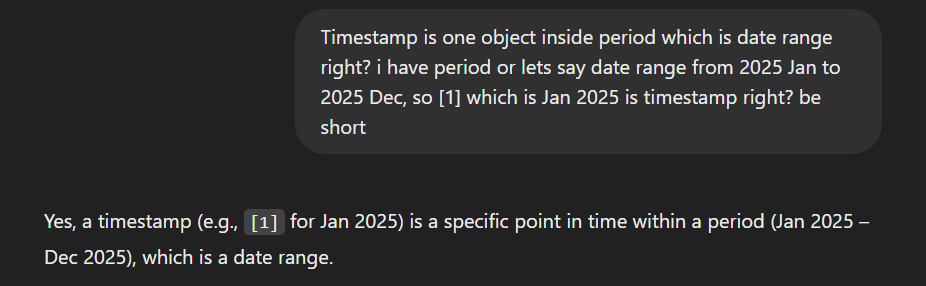

In [74]:
index.to_period() # default monthly

PeriodIndex(['2025-01', '2025-02', '2025-03', '2025-04', '2025-05', '2025-06',
             '2025-07', '2025-08', '2025-09', '2025-10', '2025-11', '2025-12'],
            dtype='period[M]')

In [86]:
index

DatetimeIndex(['2025-01-31', '2025-02-28', '2025-03-31', '2025-04-30',
               '2025-05-31', '2025-06-30', '2025-07-31', '2025-08-31',
               '2025-09-30', '2025-10-31', '2025-11-30', '2025-12-31'],
              dtype='datetime64[ns]', freq='ME')

In [92]:
# create a time series: pd.DateTimeIndex
pd.DataFrame({'data': index}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    12 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 228.0 bytes


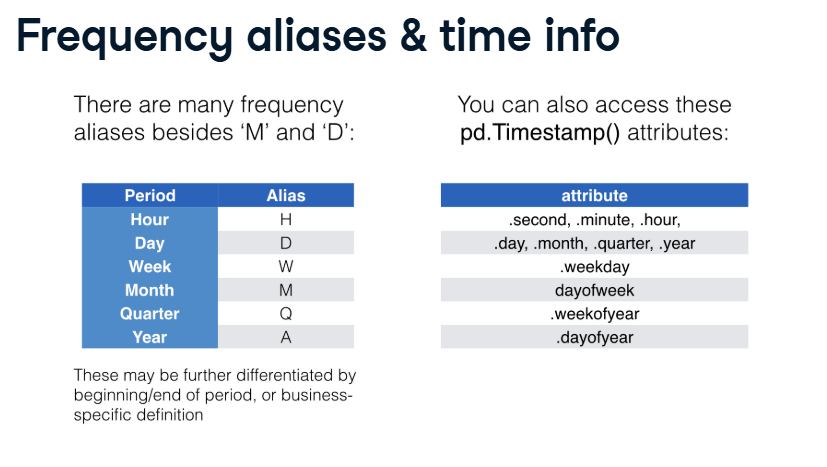

In [135]:
index.month

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32')

In [107]:
index.month_name()

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object')

In [109]:
index.year

Index([2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025], dtype='int32')

In [137]:
index.day  # or you can use business days or business calendar

Index([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31], dtype='int32')

In [117]:
index.day_name() # last days of each month

Index(['Friday', 'Friday', 'Monday', 'Wednesday', 'Saturday', 'Monday',
       'Thursday', 'Sunday', 'Tuesday', 'Friday', 'Sunday', 'Wednesday'],
      dtype='object')

In [133]:
index.dayofyear

Index([31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365], dtype='int32')

In [145]:
# converting string dates to datetime64
df.date = pd.to_datetime(df.date)

In [147]:
# setting date column as an index to our dataframe
df.set_index('date', inplace=True)

In [ ]:
df.price.plot(title = 'Bla Bla Bla')
plt.tight_layout(); plt.show()

In [ ]:
# partial string indexing
df['2025'].info()
# this will return all months for year 2025 (from 2025-1 to 2025-12)

In [151]:
df['2025-1':'2026-1'].info() 
# this will give info from 2025 Jan to 2026 Jan

In [ ]:
df.loc['2025-1-25', 'price'] # use full date with .loc[]

In [ ]:
df.loc['2025-1-25':'2025-12-12', [['price', 'level', 'name_user']]] # not sure

# .asfreq(), .shift(), .diff(), .pct_change()

In [ ]:
# our datetime index does not have frequency information, you can set it using .asfreq()
df = df.asfreq('M').info() # set calendar month frequency
# M stands for Calendar Month, D for Calendar Day

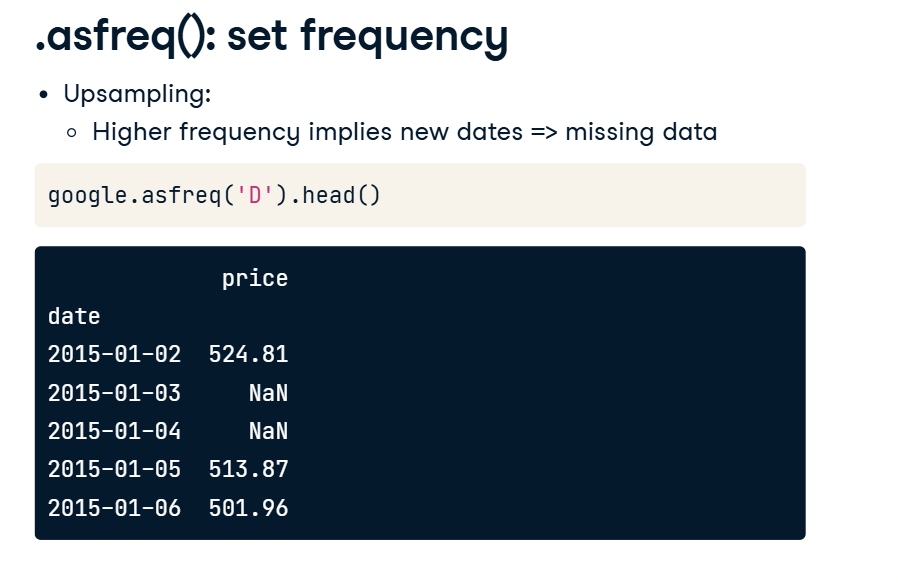

In [ ]:
df = df.asfreq('B') # business day frequency

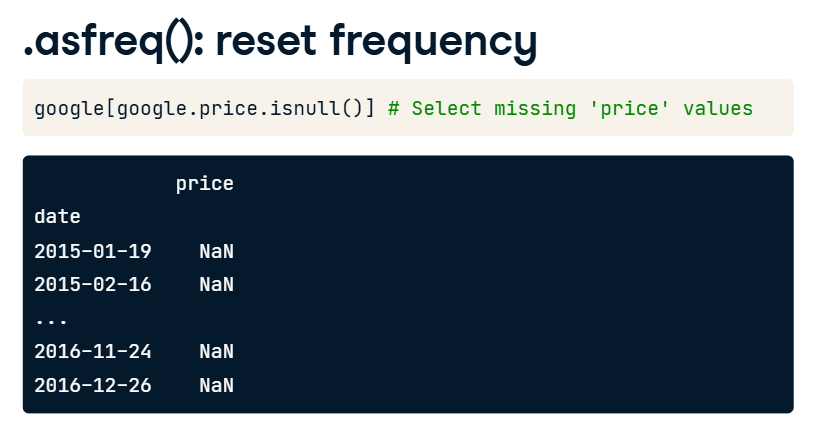

In [ ]:
df[df.price.isnull()] # select missing 'price' values

In [386]:
import warnings
warnings.filterwarnings("ignore")

In [155]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [571]:
file_path = Path('Pop.csv')

In [581]:
df = pd.read_csv(file_path, parse_dates=['date'], index_col = 'date')
# parse_dates is used instead of pd.to_datetime()

In [185]:
df.info()
# pandas built-in methods rely on pd.DateTimeIndex

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 816 entries, 1952-01-01 to 2019-12-01
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   realtime_start  816 non-null    object 
 1   value           816 non-null    float64
 2   realtime_end    816 non-null    object 
dtypes: float64(1), object(2)
memory usage: 25.5+ KB


In [189]:
df.head()

,realtime_start,value,realtime_end
date,,,
1952-01-01,2019-12-06,156309.0,2019-12-06
1952-02-01,2019-12-06,156527.0,2019-12-06
1952-03-01,2019-12-06,156731.0,2019-12-06
1952-04-01,2019-12-06,156943.0,2019-12-06
1952-05-01,2019-12-06,157140.0,2019-12-06


### .shift() Moving data between past & future

In [193]:
# by default it will move 1 period into future
df['shifted'] = df.value.shift()

date
1952-01-01         NaN
1952-02-01    156309.0
1952-03-01    156527.0
Name: shifted, dtype: float64

In [197]:
df[['value', 'shifted']].head(3)

,value,shifted
date,,
1952-01-01,156309.0,NaN
1952-02-01,156527.0,156309.0
1952-03-01,156731.0,156527.0


In [203]:
# .shift(periods = -1) which is 1 period back in time called as "lagged data"
df['lagged'] = df.value.shift(periods=-1)
df[['value', 'lagged', 'shifted']].tail(3)

,value,lagged,shifted
date,,,
2019-10-01,329982.035,330154.949,329785.872
2019-11-01,330154.949,330309.946,329982.035
2019-12-01,330309.946,NaN,330154.949


Shifting data is useful to compare data at different points in time.

In [208]:
# calculate one-period percent change
df['change'] = df.value.div(df.shifted)
df[['value', 'shifted', 'change']].head(3)
# here values move forward then it tells the percent change in shifted values

,value,shifted,change
date,,,
1952-01-01,156309.0,NaN,NaN
1952-02-01,156527.0,156309.0,1.001395
1952-03-01,156731.0,156527.0,1.001303


In [210]:
# here using return method which is commonly used for stock prices and in finance
df['return'] = df.change.sub(1).mul(100)
df[['value', 'shifted', 'change', 'return']].head(3)

,value,shifted,change,return
date,,,,
1952-01-01,156309.0,NaN,NaN,NaN
1952-02-01,156527.0,156309.0,1.001395,0.139467
1952-03-01,156731.0,156527.0,1.001303,0.130329


### .diff() built-in time-series change
Calculates the change between values at different points in time. By default, the diff version of the prices is the difference in value since the last day stocks were traded (EX:)

In [213]:
df['diff'] = df.value.diff()
df[['value', 'diff']].head(3)

,value,diff
date,,
1952-01-01,156309.0,NaN
1952-02-01,156527.0,218.0
1952-03-01,156731.0,204.0


### .pct_change() built-in time-series % change (returns)
Percent change for two adjacent periods

In [227]:
df['pct_change'] = df.value.pct_change().mul(100)
df[['value', 'return', 'pct_change']].head(5)
# below return and pct_change values are same which means both are same methods

,value,return,pct_change
date,,,
1952-01-01,156309.0,NaN,NaN
1952-02-01,156527.0,0.139467,0.139467
1952-03-01,156731.0,0.130329,0.130329
1952-04-01,156943.0,0.135264,0.135264
1952-05-01,157140.0,0.125523,0.125523


In [225]:
# multi-period returns
# if you provide higher value, you can calculate returns for data points several periods apart
df['return_3p'] = df.value.pct_change(periods = 3).mul(100)
df[['value', 'return_3p']].head(5)

,value,return_3p
date,,
1952-01-01,156309.0,NaN
1952-02-01,156527.0,NaN
1952-03-01,156731.0,NaN
1952-04-01,156943.0,0.405607
1952-05-01,157140.0,0.391626


# Normalizing 

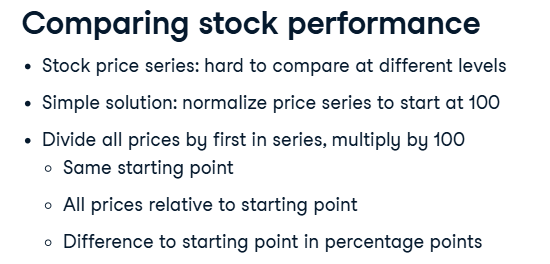

In [231]:
# Normalizing a single series (1)
first_value = df.value.iloc[0] # int-based selection
first_value

156309.0

In [233]:
first_value == df.loc['1952-01-01', 'value']

True

<Axes: title={'center': 'Pop Normalized Series'}, xlabel='date'>

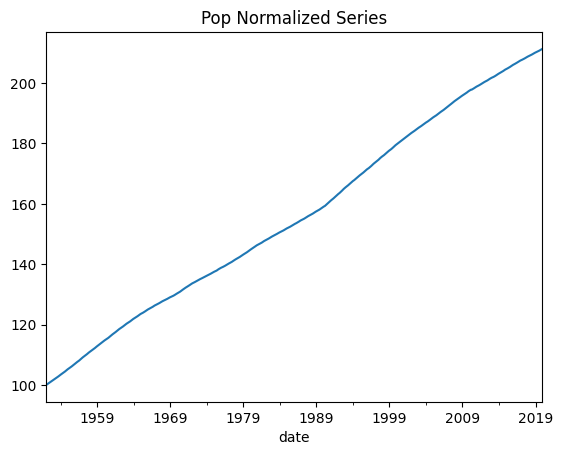

In [243]:
# Normalizing a single series (2)
normalized = df.value.div(first_value).mul(100)
normalized.plot(title = 'Pop Normalized Series')
# plt.tight_layout(); plt.show()
# below you can see that it starts at 100
# you can see that starting from 100 to 200, values increased by 100 Percentage Points

<!-- 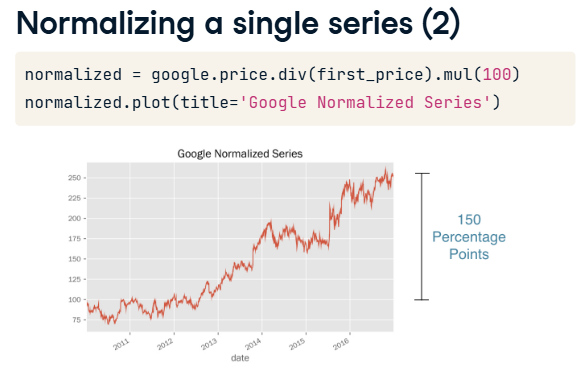 -->

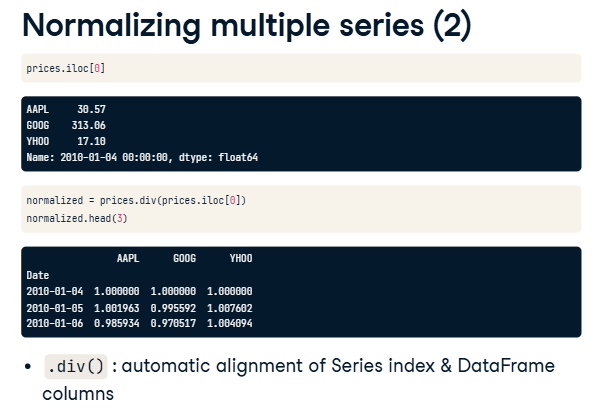

In [251]:
df = df[['value']]
df.iloc[0]

value    156309.0
Name: 1952-01-01 00:00:00, dtype: float64

In [263]:
normalized = df.div(df.iloc[0]) #.mul()
normalized.head(3)

,value
date,
1952-01-01,1.000000
1952-02-01,1.001395
1952-03-01,1.002700


In [439]:
normalized.plot(title = 'Pop Normalized Series')

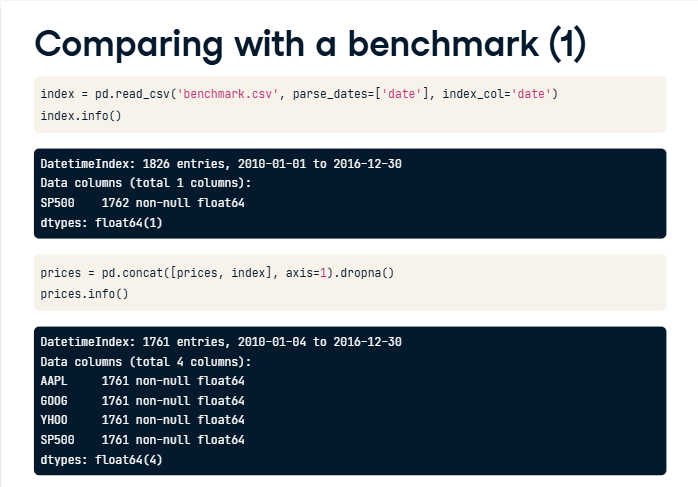

=> Above is useful because you can get Nan so it removes automatically. And it is concatenating two datasets, look carefully, for benchmark he used another dataset data.

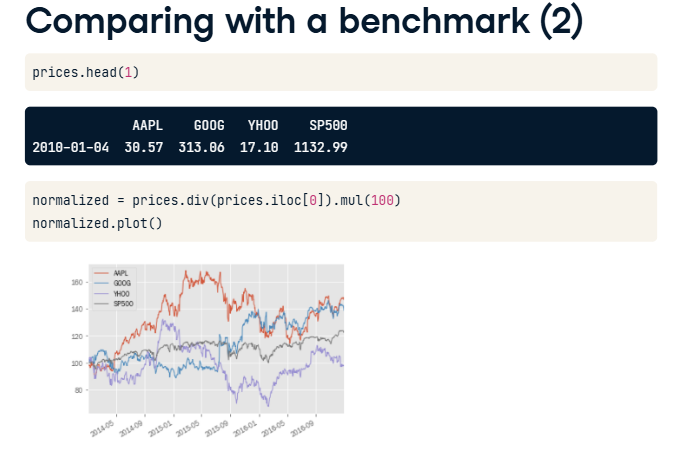

In [ ]:
# Plotting performance difference
# you can now see how each stock performed relative to the benchmark
diff = normalized[tickers].sub(normalized['Benchmark-Column-Name'], axis = 0)
# .sub(..., axis=0) Subtract a Series from each DataFrame column by aligning indexs
diff.plot()

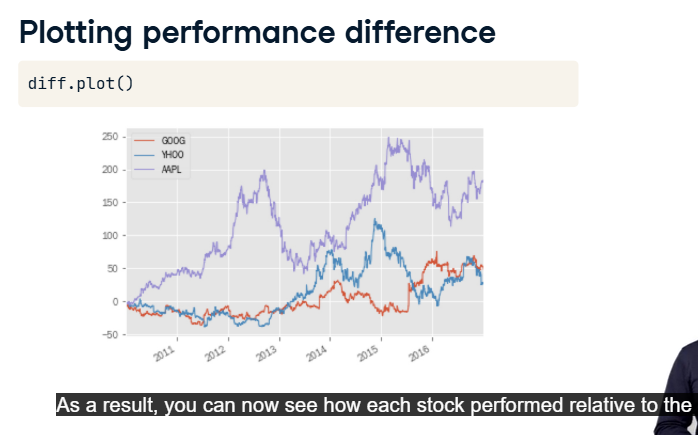 benchmark


# Resampling
Changing the time-series frequency.\
=> Sometimes you need to convert two time-series to a common frequency to analyze them together.\
=> When you change the frequency, it also impacts the values in the DataFrame.\
`Upsampling`: fill or interpolate existing data\
`Downsampling`: aggregate existing data

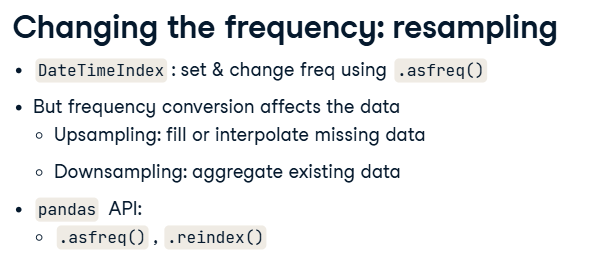

In [388]:
dates = pd.date_range(start = '2025', periods = 4, freq = 'Q')
data = range(1, 5)
quarterly = pd.Series(data=data, index=dates)
quarterly

2025-03-31    1
2025-06-30    2
2025-09-30    3
2025-12-31    4
Freq: QE-DEC, dtype: int64

## Upsampling with .fill()

`Upsampling`: quarter => month & (fill)

In [390]:
monthly = quarterly.asfreq('M') # to month-end frequency
monthly
# as you can see: Upsampling creates missing values
# because we had data for Q4 months: 03, 06, 09, 12 only
# It will take 12th month as the last for quarter hence it is starting from month 03

2025-03-31    1.0
2025-04-30    NaN
2025-05-31    NaN
2025-06-30    2.0
2025-07-31    NaN
2025-08-31    NaN
2025-09-30    3.0
2025-10-31    NaN
2025-11-30    NaN
2025-12-31    4.0
Freq: ME, dtype: float64

In [392]:
# to solve missing values issue
monthly = monthly.to_frame('baseline') # to DataFrame
# you can convert a Series to a DataFrame by applying the to_frame() method, passing a
# column name as parameter

In [394]:
monthly

,baseline
2025-03-31,1.0
2025-04-30,NaN
2025-05-31,NaN
2025-06-30,2.0
2025-07-31,NaN
2025-08-31,NaN
2025-09-30,3.0
2025-10-31,NaN
2025-11-30,NaN
2025-12-31,4.0


In [318]:
# monthly was a series before and now we converted to a DataFrame using to_frame()
# that's why below we can use df methods to it

In [396]:
# Upsampling: fill methods
monthly['ffill'] = quarterly.asfreq('M', method = 'ffill')
monthly['bfill'] = quarterly.asfreq('M', method = 'bfill')
monthly['value'] = quarterly.asfreq('M', fill_value = 0)
monthly

,baseline,ffill,bfill,value
2025-03-31,1.0,1,1,1
2025-04-30,NaN,1,2,0
2025-05-31,NaN,1,2,0
2025-06-30,2.0,2,2,2
2025-07-31,NaN,2,3,0
2025-08-31,NaN,2,3,0
2025-09-30,3.0,3,3,3
2025-10-31,NaN,3,4,0
2025-11-30,NaN,3,4,0
2025-12-31,4.0,4,4,4


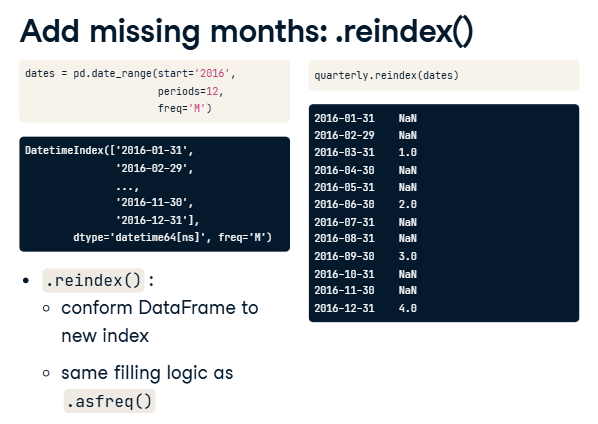

In [398]:
dates = pd.date_range(start = '2025', periods = 12, freq = 'M')

In [400]:
quarterly = quarterly.reindex(dates)
quarterly

2025-01-31    NaN
2025-02-28    NaN
2025-03-31    1.0
2025-04-30    NaN
2025-05-31    NaN
2025-06-30    2.0
2025-07-31    NaN
2025-08-31    NaN
2025-09-30    3.0
2025-10-31    NaN
2025-11-30    NaN
2025-12-31    4.0
Freq: ME, dtype: float64

In [402]:
quarterly.fillna(method = 'ffill', inplace = True)
quarterly

2025-01-31    NaN
2025-02-28    NaN
2025-03-31    1.0
2025-04-30    1.0
2025-05-31    1.0
2025-06-30    2.0
2025-07-31    2.0
2025-08-31    2.0
2025-09-30    3.0
2025-10-31    3.0
2025-11-30    3.0
2025-12-31    4.0
Freq: ME, dtype: float64

In [404]:
quarterly.fillna(method = 'bfill', inplace = True)
quarterly

2025-01-31    1.0
2025-02-28    1.0
2025-03-31    1.0
2025-04-30    1.0
2025-05-31    1.0
2025-06-30    2.0
2025-07-31    2.0
2025-08-31    2.0
2025-09-30    3.0
2025-10-31    3.0
2025-11-30    3.0
2025-12-31    4.0
Freq: ME, dtype: float64

## Upsampling with .interpolate() and .resample()

`.resample()` is similar to `.groupby()`\
=> Groups data within resampling period and applies one or several methods to each group.\
=> New date determindes by offset - start, end, etc\
=> Upsampling: fill from existing or interpolate values.\
=> Downsampling: apply aggregation to existing data.

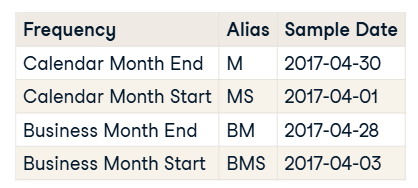\
The business dates may deviate from the calendar month due to weekends and holidays.

- `Upsampling`: Increases the frequency of data points (e.g., daily to hourly).
- `Downsampling`: Reduces the frequency of data points (e.g., hourly to daily).
- `Resampling`: The process of changing the frequency of time series data, which includes both upsampling and downsampling.

In [429]:
df.asfreq('MS').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 816 entries, 1952-01-01 to 2019-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   816 non-null    float64
dtypes: float64(1)
memory usage: 12.8 KB


In [433]:
df.resample('MS') # creates Resampler object
# when you apply the resample method, it returns a new object called Resampler object.

In [447]:
df.loc[df.value.isna()]

,value
date,


In [453]:
df.asfreq('MS').equals(df.resample('MS').asfreq())

True

In [503]:
resample_bms1 = df.resample('BMS').ffill().add_suffix('_ffill')
resample_bms1.head()

,value_ffill
date,
1952-01-01,156309.0
1952-02-01,156527.0
1952-03-03,156731.0
1952-04-01,156943.0
1952-05-01,157140.0


In [505]:
resample_bms2 = df.resample('BMS').interpolate().add_suffix('_inter')
resample_bms2.head()

,value_inter
date,
1952-01-01,156309.0
1952-02-01,156527.0
1952-03-03,156735.0
1952-04-01,156943.0
1952-05-01,157140.0


`.interpolate()`: finds points on straight like between existing data.\
`.fill()`: Replaces missing values with a specific value (e.g., forward fill, backward fill).\
`.interpolate()`: Estimates missing values based on surrounding data (e.g., linear, polynomial interpolation).

`.interpolate()` is usually better because it estimates missing values smoothly based on trends, preserving data variation. `.fill()`, especially forward or backward fill, can make many values the same, which might distort patterns.

Concatenating two DataFrames

In [486]:
df1 = pd.DataFrame([1, 2, 3], columns=['df1'])
df2 = pd.DataFrame([4, 5, 6], columns=['df2'])
pd.concat([df1, df2]) 
# below you can see it is row-wise concatenation to prevent this use column-wise axis=1

,df1,df2
0,1.0,NaN
1,2.0,NaN
2,3.0,NaN
0,NaN,4.0
1,NaN,5.0
2,NaN,6.0


`axis=1` means operation is performed column-wise (i.e., along columns).\
When concatenating DataFrames, axis=1 is used to merge them side by side (adding columns).

In [491]:
pd.concat([df1, df2], axis = 1)
# axis = 1 means concatenate horizontally

,df1,df2
0,1,4
1,2,5
2,3,6


<Axes: xlabel='date'>

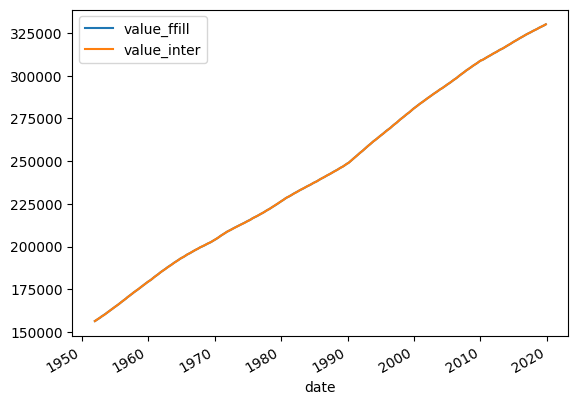

In [531]:
pd.concat([resample_bms1, resample_bms2], axis = 1).loc[:].plot() # loc['2020']

Ex: you can concatenate Apple and Google stock prices using axis=1 to align them by date and then plot their trends together. axis=1 is the right choice for this.

## Downsampling and aggregation methods

- hour to day
- day to month, etc.
- Aggregation metrics: mean, median, last value


In this case, you need to decide how to summarize the existing data. Ex: 24 hours become a single day. You have aggregation metrics like, mean, median or the last value. And your choice will depend on the context. \
For Upsampling it was the opposite, single day became 24 hours, so on.

In [606]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 816 entries, 1952-01-01 to 2019-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   816 non-null    float64
dtypes: float64(1)
memory usage: 45.0 KB


In [596]:
dff = df.resample('D').asfreq()

In [602]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24807 entries, 1952-01-01 to 2019-12-01
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   816 non-null    float64
dtypes: float64(1)
memory usage: 387.6 KB


Above we have additional entries and the expected frequency information. Ex: Freq: D

In [643]:
dff.head()

,value
date,
1952-01-01,156309.0
1952-01-02,NaN
1952-01-03,NaN
1952-01-04,NaN
1952-01-05,NaN


=> from daily data to monthly data\
.resample().mean() Monthly average, assigned to end of calendar month.\
You can see that the monthly average has been assigned to the last day of the calendar month.\
If it was MS then it could be assigned to the first day of the month and so on.

In [635]:
dff.resample('M').mean().head()

,value
date,
1952-01-31,156309.0
1952-02-29,156527.0
1952-03-31,156731.0
1952-04-30,156943.0
1952-05-31,157140.0


In [651]:
dff.resample('M').median().head()

,value
date,
1952-01-31,156309.0
1952-02-29,156527.0
1952-03-31,156731.0
1952-04-30,156943.0
1952-05-31,157140.0


You can also apply multiple aggregations at once.

In [666]:
dff.resample('M').agg(['mean', 'median', 'std']).head()

value              
                mean    median std
date                              
1952-01-31  156309.0  156309.0 NaN
1952-02-29  156527.0  156527.0 NaN
1952-03-31  156731.0  156731.0 NaN
1952-04-30  156943.0  156943.0 NaN
1952-05-31  157140.0  157140.0 NaN

Plotting resampled data.\
`ax = ax`: Matplotlib allows you to plot again on the axes object returned by the first plot.

<Axes: xlabel='date'>

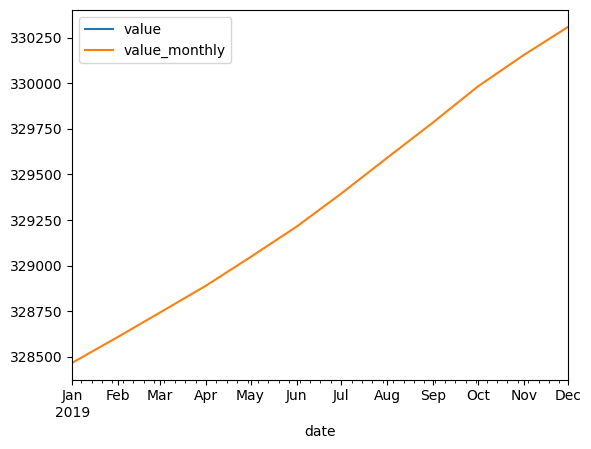

In [669]:
dff = dff.loc['2019':]
ax = dff.plot()
monthly = dff.resample('M').mean()
monthly.add_suffix('_monthly').plot(ax=ax)

Pandas provide first and last methods that allow you to select the first or last value from the resampling period to representing the group. Below example, shows month end and month start, and selects the first data point from each resampling period.

`resample().first()`: Takes the first value in each resampled period.\
`resample().last()`: Takes the last value in each resampled period.\
resample('M').first() → Gives the passenger count from the start of each month.\
resample('M').last() → Gives the passenger count from the end of each month.

In [707]:
dff.resample('MS').first().head()

,value
date,
2019-01-01,328467.812
2019-02-01,328610.744
2019-03-01,328742.843
2019-04-01,328890.250
2019-05-01,329047.319


In [709]:
dff.resample('M').last().head()

,value
date,
2019-01-31,328467.812
2019-02-28,328610.744
2019-03-31,328742.843
2019-04-30,328890.250
2019-05-31,329047.319


For downsampling, you need to aggregate the values (e.g., mean(), median(), or mode()).\
If using mean/median, you don’t need first() or last() because you're summarizing all values.\
If choosing a single value per period, use first() or last():\
Use last() if data is recorded at the end of each month.\
Use first() if data is recorded at the start of each month.

You have 31 days in January month, and you got daily freq, and you want to convert it to monthly freq, so here is the thing, you need to get first value which is 1st of January or last value which is 31th of January. Or you can just aggregate by taking mean or median of these all daily values to make single value and assign to each and every month. 

# Window Functions

In [760]:
# dff.asfreq('MS')

In [772]:
r90 = dff.rolling(window = 36).mean() # 3 years

<Axes: xlabel='date'>

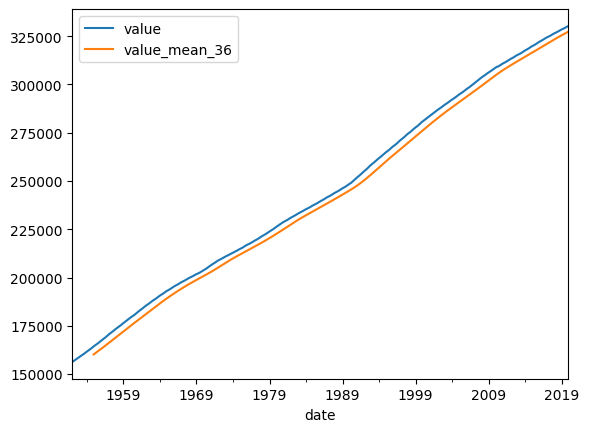

In [778]:
dff.join(r90.add_suffix('_mean_36')).plot()
# .join: concatenate Series or DataFrame aling axis=1

<Axes: xlabel='date'>

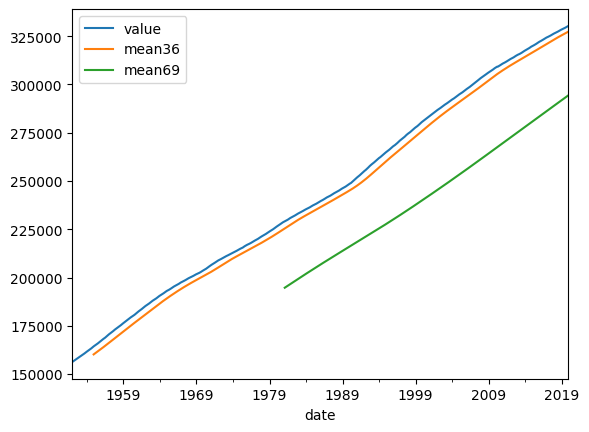

In [808]:
dff['mean36'] = r90
r69 = dff.value.rolling(window=350).mean()
dff['mean69'] = r69; dff.plot()

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

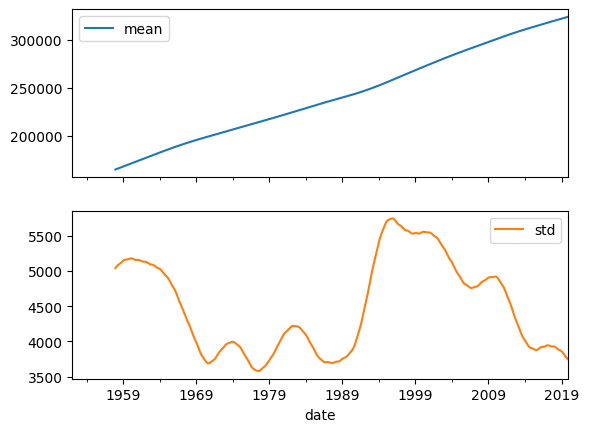

In [810]:
r = dff.value.rolling(window = 72).agg(['mean', 'std'])
r.plot(subplots = True)

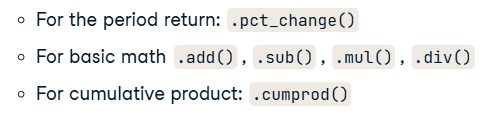

<Axes: >

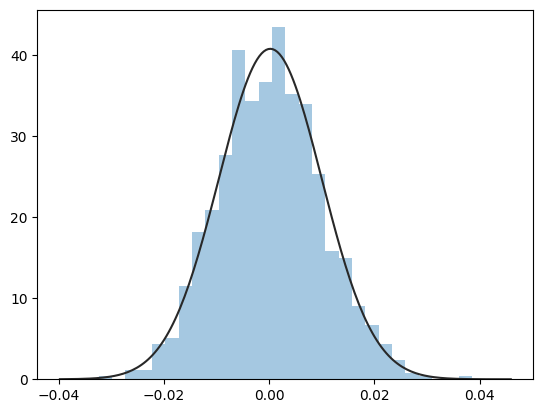

In [817]:
from numpy.random import normal, seed
from scipy.stats import norm
seed(42)
random_returns = normal(loc = 0, scale = 0.01, size = 1000)
sns.distplot(random_returns, fit = norm, kde=False)

<Axes: xlabel='value', ylabel='Density'>

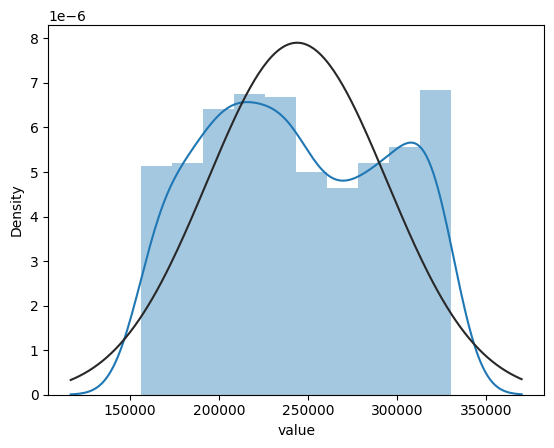

In [834]:
sns.distplot(df.value, fit=norm, kde=True)

In a random walk, the distribution is typically non-normal.\
.plot(subplots = True)

For ARIMA and similar models, linear correlation between variables isn’t directly important since they focus on a single time series' past values. However, for multivariate models (e.g., VAR), correlation between variables is more relevant for forecasting.